In [1]:
from tqdm.autonotebook import tqdm
import os
import numpy as np
import pacmap
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import seaborn as sns

import tensorflow as tf
from sklearn.utils import shuffle
from keras.preprocessing import sequence
from keras.models import Sequential
from keras.layers import Dense, Embedding
from keras.layers import LSTM
import sentencepiece as spm
from IPython.display import clear_output
from keras.callbacks import ModelCheckpoint
from sklearn.metrics import f1_score
import pickle

from tensorflow.keras.utils import plot_model
import subprocess
import sys
import time
from termcolor import colored, cprint
from sklearn import metrics
from sklearn.cluster import AgglomerativeClustering
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import numpy as np
from tqdm import tqdm
import pacmap

/tmp/ipykernel_1785248/1159363073.py:1: TqdmExperimentalWarning: Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)
  from tqdm.autonotebook import tqdm
/home/g/miniconda3/envs/tf-3.9/lib/python3.9/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.2
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
def saveData(typ, obj, name):
    with open('./data/' +  name + "_" + typ + '.pkl', 'wb') as f:
        pickle.dump(obj, f)
        
def loadData(typ, name):
    ret = None
    with open('./data/' +  name + "_" + typ + '.pkl', 'rb') as f:
        ret = pickle.load(f)
    assert ret is not None
    return ret

In [3]:
TESTS=["100k_rnd", "200k_rnd", "100k", "100k_dict", "200k", "200k_dict"]
RES_NUM=1

In [4]:
resources = []
raws = []
for t in TESTS:
    d = loadData("training", t)  # numeric, weights, data, labels
    transpose = np.array(d["labels"]).T
    raws.append(np.random.choice(transpose[RES_NUM], 10000, replace=False))
    resources.append(transpose)

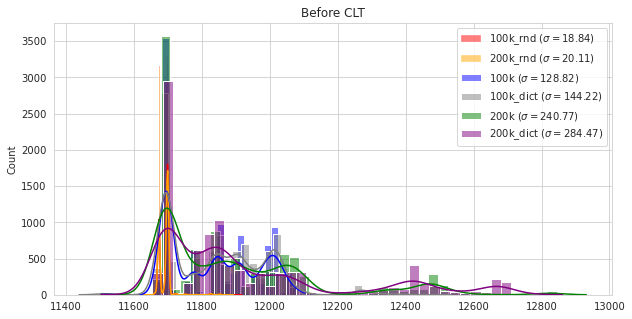

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

def plot_gaussian_distribution(data, title, names):
    plt.figure(figsize=(10, 5))

    sns.set_style('whitegrid')
    colors = ["red", "orange", "blue", "grey", "green", "purple"]
    for c, d, n in zip(colors,data,names):
        std = np.std(d)
        sns.histplot(d, kde=True, color=c, label=fr"{n} ($\sigma=${std:0.2f})")

    plt.title(title)
    plt.legend()
    plt.show()

plot_gaussian_distribution(raws, "Before CLT", TESTS)


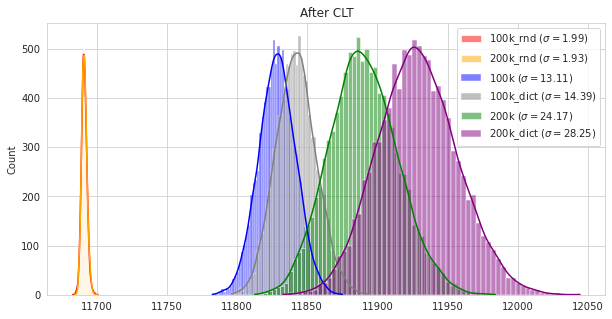

In [6]:
gauss = []
# Apply CLT
for r in resources:
    cltVals = []
    for i in range(10000): 
        x = np.random.choice(r[RES_NUM], 100, replace=True).mean()
        cltVals.append(x)
    gauss.append(cltVals)
plot_gaussian_distribution(gauss, "After CLT", TESTS)

In [7]:
transformerOnly_model = keras.Model(test.inputs, test.layers[3].output)

#transformerOnly_model = keras.Model(model.inputs, model.get_layer("transformer_block_1").output)
transformerOnly_model.summary()

NameError: name 'test' is not defined

In [ ]:
#vizLayer(transformerOnly_model, d["numeric"])

In [ ]:
d["numeric"][:1]

In [ ]:
tfOut = transformerOnly_model(d["numeric"][:2])
tfOut[0].shape

In [ ]:
from scipy.stats import entropy


In [ ]:
for x in tf.sigmoid(tfOut):
    print(x)

In [ ]:
tfOut[0]

In [ ]:
entr = entropy(tfOut[0])
  
# Display result
print("\n\nComputed Entropy: ", entr)

In [ ]:
entropy([0.5, 0.5])

In [ ]:
from tensorflow.keras.metrics import kl_divergence




In [ ]:
kl_divergence(tfOut[1], tfOut[0])